In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDRegressor


In [2]:
train_set=pd.read_csv('train.csv')
test_set=pd.read_csv('test.csv')
train_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Chargement du  Dataset

In [2]:
train_set=pd.read_csv('train.csv')
test_set=pd.read_csv('test.csv')
#variable Qualitative
var_nominale=['MSSubClass','MSZoning','Street','LotShape','LandContour','Condition1','Condition2','Utilities','LotConfig','LandSlope','Neighborhood','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','Foundation','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','SaleCondition','SaleType','PavedDrive','GarageCond','GarageQual','GarageFinish','GarageType','Functional','KitchenQual']
#variable Quantitative
var_quantitative1=['renovation','KitchenAbvGr','BedroomAbvGr','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch','3SsnPorch','LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','YrSold','MoSold','MiscVal','PoolArea']
var_quantitative=['YearRemodAdd','YearBuilt','KitchenAbvGr','BedroomAbvGr','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch','3SsnPorch','LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','YrSold','MoSold','MiscVal','PoolArea']

In [3]:
## check some info about dataset
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_set[var_quantitative].describe()

,YearRemodAdd,YearBuilt,KitchenAbvGr,BedroomAbvGr,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,YrSold,MoSold,MiscVal,PoolArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1984.865753,1971.267808,1.046575,2.866438,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,...,70.049958,10516.828082,443.639726,46.549315,567.240411,1057.429452,2007.815753,6.321918,43.489041,2.758904
std,20.645407,30.202904,0.220338,0.815778,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,...,24.284752,9981.264932,456.098091,161.319273,441.866955,438.705324,1.328095,2.703626,496.123024,40.177307
min,1950.000000,1872.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,1.000000,0.000000,0.000000
25%,1967.000000,1954.000000,1.000000,2.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,...,59.000000,7553.500000,0.000000,0.000000,223.000000,795.750000,2007.000000,5.000000,0.000000,0.000000
50%,1994.000000,1973.000000,1.000000,3.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,...,69.000000,9478.500000,383.500000,0.000000,477.500000,991.500000,2008.000000,6.000000,0.000000,0.000000
75%,2004.000000,2000.000000,1.000000,3.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,...,80.000000,11601.500000,712.250000,0.000000,808.000000,1298.250000,2009.000000,8.000000,0.000000,0.000000
max,2010.000000,2010.000000,3.000000,8.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,...,313.000000,215245.000000,5644.000000,1474.000000,2336.000000,6110.000000,2010.000000,12.000000,15500.000000,738.000000


In [5]:
data_list1=train_set.columns.tolist()
data_list2=test_set.columns.tolist()

In [6]:
train_set['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

<AxesSubplot:>

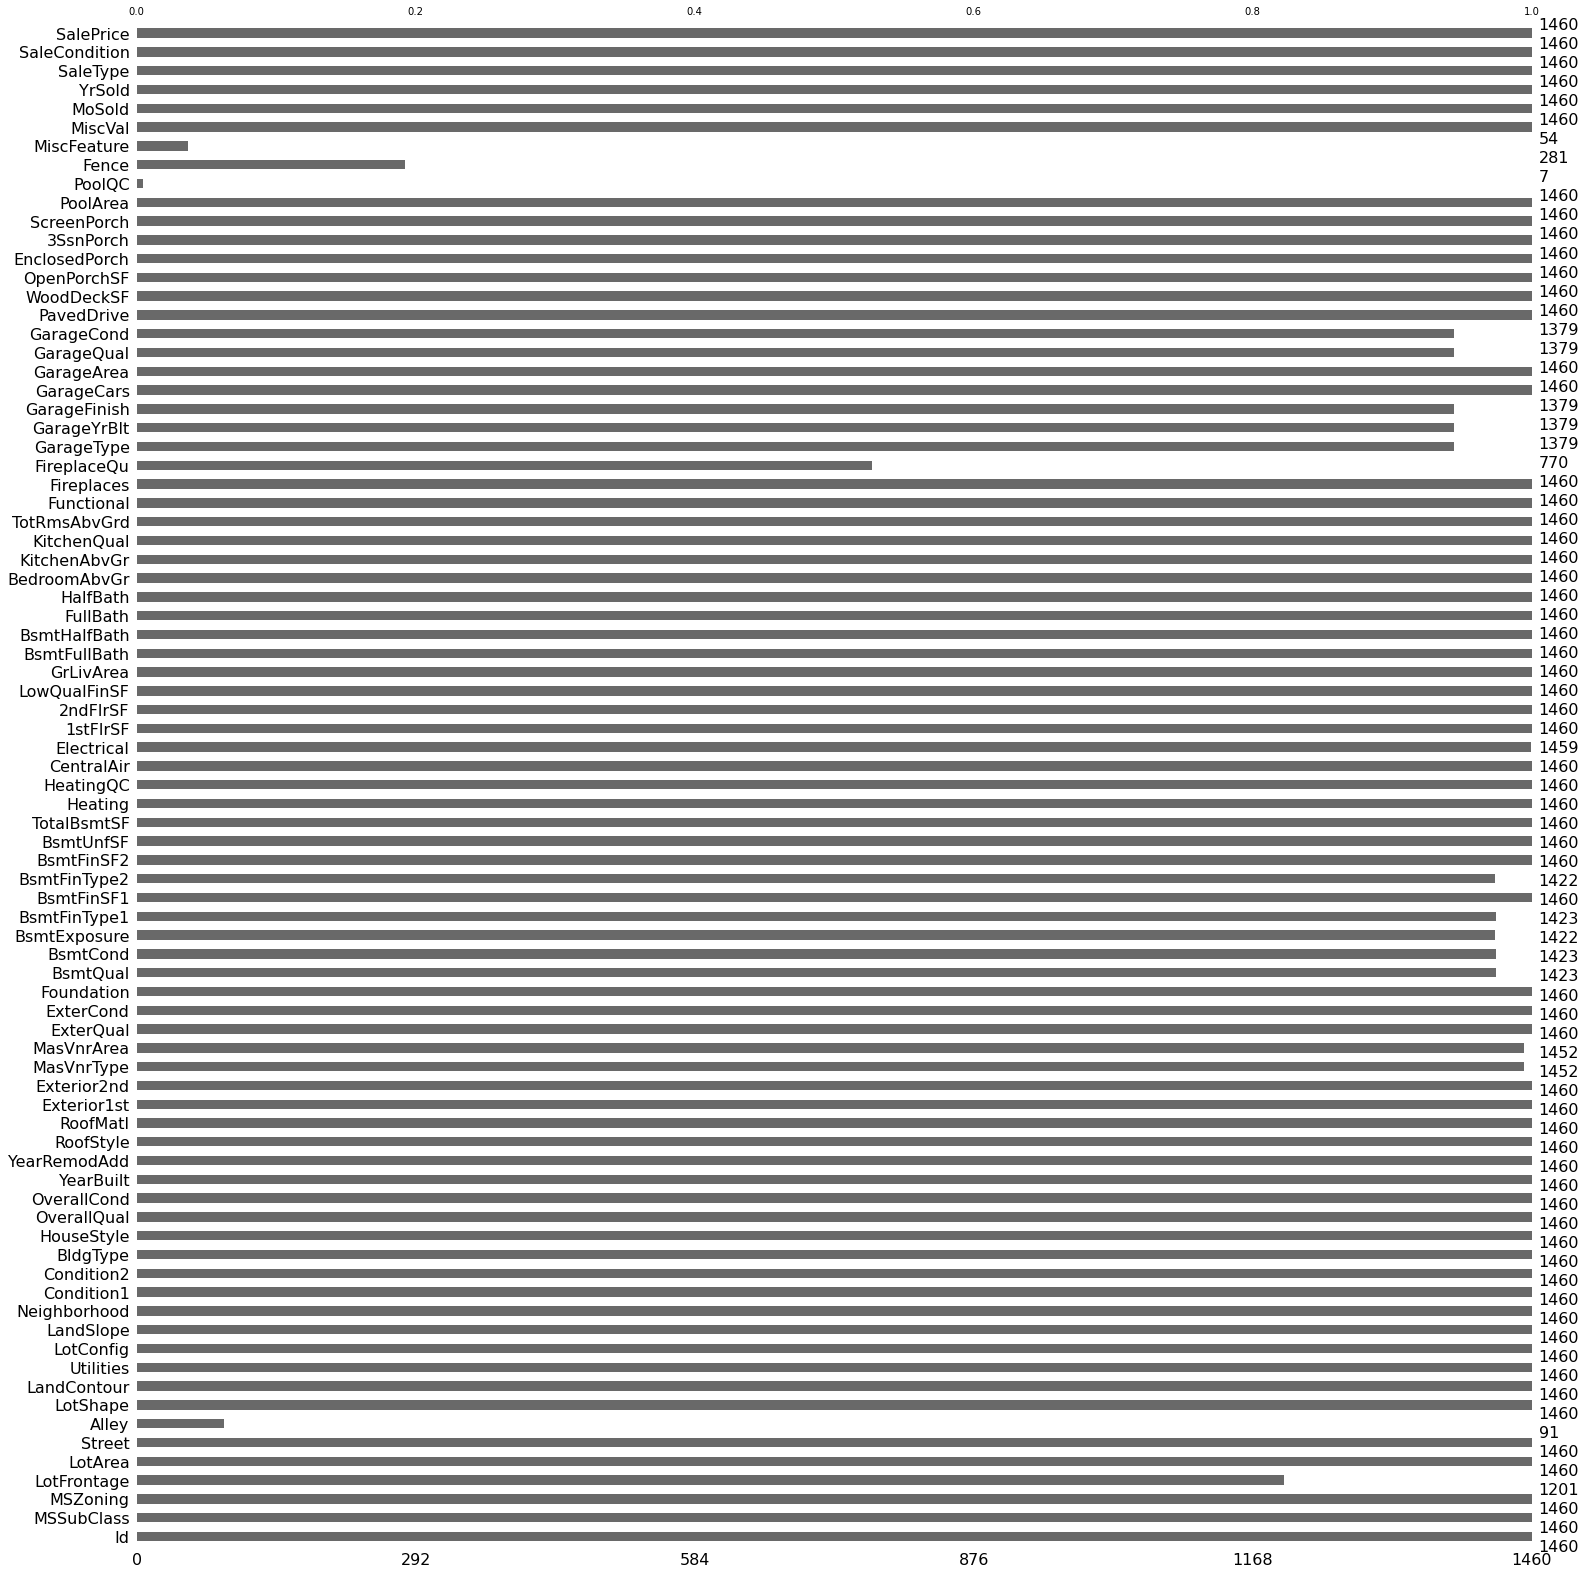

In [7]:
## check nulls using missingno libraries
missingno.bar(train_set)

### Variables Manquantes

In [8]:
# cherche values null
total = train_set.isnull().sum().sort_values(ascending=False)
percent = (train_set.isnull().sum()/train_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [9]:
#Supprimer les colonnes pour lequels on atrop de val manquantes 
train_set=train_set.drop(['MiscFeature','Fence','PoolQC','Alley','FireplaceQu','MasVnrType'],axis=1)
test_set=test_set.drop(['MiscFeature','Fence','PoolQC','Alley','FireplaceQu','MasVnrType'],axis=1)

In [10]:
train_set['GarageQual'].value_counts()
train_set['GarageFinish'].value_counts()
train_set['GarageType'].value_counts()
train_set['GarageCond'].value_counts()
train_set['Electrical'].value_counts()
train_set['BsmtQual'].value_counts()
train_set['BsmtCond'].value_counts()
train_set['BsmtExposure'].value_counts()
train_set['BsmtFinType1'].value_counts()
train_set['BsmtFinType2'].value_counts()

#numerical
train_set['GarageYrBlt'].value_counts()
train_set['LotFrontage'].value_counts()
train_set['MasVnrArea'].value_counts()




avg_1=train_set['GarageYrBlt'].astype('float').mean(axis=0)
avg_2=train_set['LotFrontage'].astype('float').mean(axis=0)
avg_3=train_set['MasVnrArea'].astype('float').mean(axis=0)

In [57]:
train_set['GarageQual'].replace(np.nan,train_set['GarageQual'][0],inplace=True)
train_set['GarageCond'].replace(np.nan,train_set['GarageCond'][0],inplace=True)
train_set['GarageFinish'].replace(np.nan,train_set['GarageFinish'][5],inplace=True)
train_set['GarageType'].replace(np.nan,train_set['GarageType'][0],inplace=True)
train_set['Electrical'].replace(np.nan,train_set['Electrical'][0],inplace=True)
train_set['BsmtQual'].replace(np.nan,train_set['BsmtQual'][3],inplace=True)
train_set['BsmtCond'].replace(np.nan,train_set['BsmtCond'][0],inplace=True)
train_set['BsmtExposure'].replace(np.nan,train_set['BsmtExposure'][0],inplace=True)
train_set['BsmtFinType1'].replace(np.nan,train_set['BsmtFinType1'][8],inplace=True)
train_set['BsmtFinType2'].replace(np.nan,train_set['BsmtFinType2'][0],inplace=True)
train_set['GarageYrBlt'].replace(np.nan,avg_1,inplace=True)
train_set['LotFrontage'].replace(np.nan,avg_2,inplace=True)
train_set['MasVnrArea'].replace(np.nan,avg_3,inplace=True)


test_set['GarageQual'].replace(np.nan,train_set['GarageQual'][0],inplace=True)
test_set['GarageCond'].replace(np.nan,train_set['GarageCond'][0],inplace=True)
test_set['GarageFinish'].replace(np.nan,train_set['GarageFinish'][5],inplace=True)
test_set['GarageType'].replace(np.nan,train_set['GarageType'][0],inplace=True)
test_set['Electrical'].replace(np.nan,train_set['Electrical'][0],inplace=True)
test_set['BsmtQual'].replace(np.nan,train_set['BsmtQual'][3],inplace=True)
test_set['BsmtCond'].replace(np.nan,train_set['BsmtCond'][0],inplace=True)
test_set['BsmtExposure'].replace(np.nan,train_set['BsmtExposure'][0],inplace=True)
test_set['BsmtFinType1'].replace(np.nan,train_set['BsmtFinType1'][8],inplace=True)
test_set['BsmtFinType2'].replace(np.nan,train_set['BsmtFinType2'][0],inplace=True)
test_set['GarageYrBlt'].replace(np.nan,avg_1,inplace=True)
test_set['LotFrontage'].replace(np.nan,avg_2,inplace=True)
test_set['MasVnrArea'].replace(np.nan,avg_3,inplace=True)

test_set.dropna(axis=0,inplace=True)

C:\Users\MohamedHosameKANALI\AppData\Local\Temp\ipykernel_24220\3099478925.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.dropna(axis=0,inplace=True)


In [58]:
#train_set.drop(train_set['GrLivArea'][train_set['GrLivArea']>4000].index,inplace=True)

In [59]:
train_set.isnull().sum().sort_values()
test_set.isnull().sum().sort_values()


LotFrontage             0
ExterCond_Ex            0
ExterCond_Fa            0
ExterCond_Gd            0
ExterCond_Po            0
                       ..
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
Neighborhood_Timber     0
renovation              0
Length: 261, dtype: int64

## Analyse exploratoire des données

In [60]:
# Target
train_set['SalePrice'].describe()

count       210.000000
mean     187254.904762
std       79879.117748
min       40000.000000
25%      129900.000000
50%      170500.000000
75%      230000.000000
max      501837.000000
Name: SalePrice, dtype: float64

C:\Users\MohamedHosameKANALI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

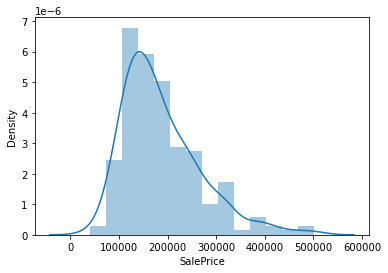

In [61]:
# histogramme
sns.distplot(train_set['SalePrice'])

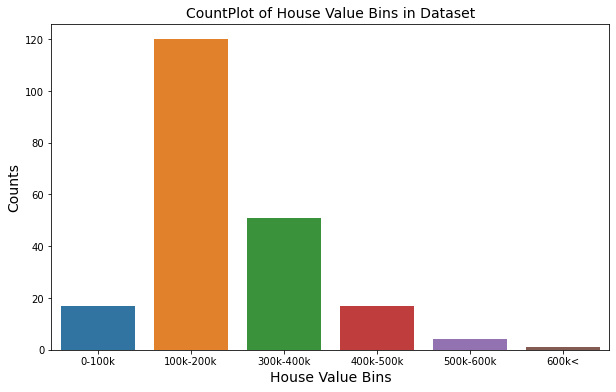

In [62]:
## Try for (SalePrice) to convert it into chunks (bins)
## Cut this Numerical Feature to Categorical One 
## Ex: for the following example -- any value between range (0-100k) will be the same category (like histogram)

house_value_bins = pd.cut(x=train_set['SalePrice'], 
                          bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf],
                          labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])


## Countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

### Verifier la Correlation entre les Features et Target


Text(0.5, 1.0, 'Carte De Correlation')

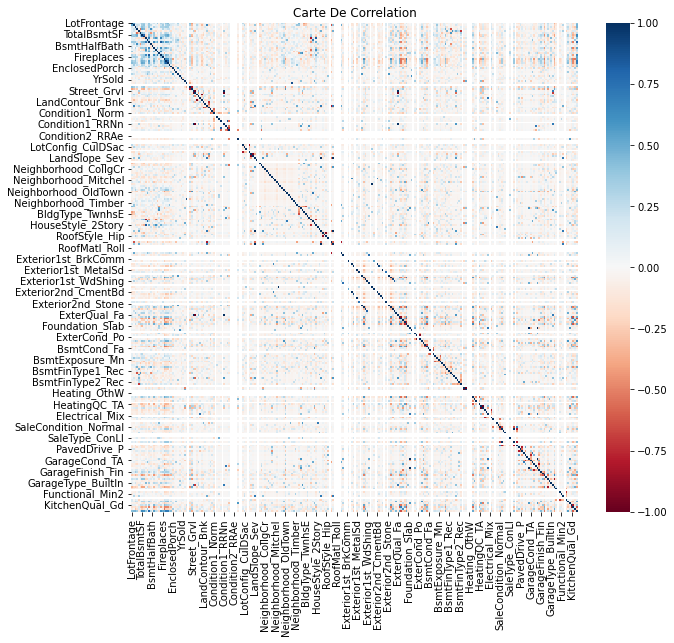

In [63]:
# using pearson correlation
plt.figure(figsize=(10,9))
sns.heatmap(train_set.corr(),cmap="RdBu").set_title('Carte De Correlation')


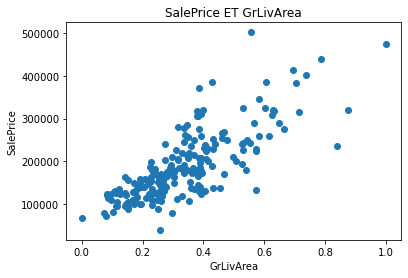

In [64]:
# Scatterplot with (GrLivArea) & (SalePrice)

plt.scatter(train_set['GrLivArea'],train_set['SalePrice'])
plt.title('SalePrice ET GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

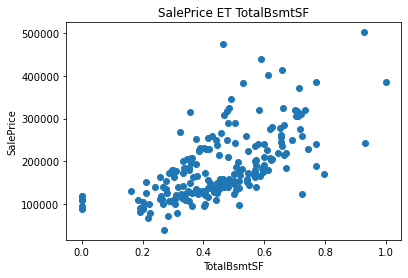

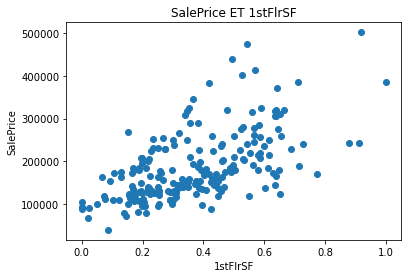

In [65]:
# Scatterplot with (TotalBsmtSF) & (SalePrice)

plt.scatter(train_set['TotalBsmtSF'],train_set['SalePrice'])
plt.title('SalePrice ET TotalBsmtSF')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()
# Scatterplot with (1stFlrSF) & (SalePrice)

plt.scatter(train_set['1stFlrSF'],train_set['SalePrice'])
plt.title('SalePrice ET 1stFlrSF')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.show()

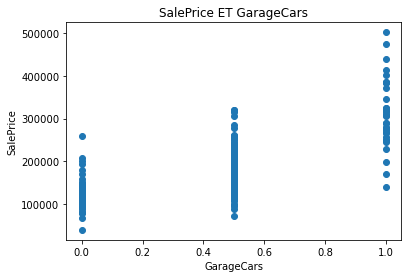

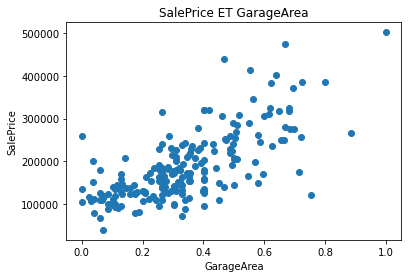

In [66]:
# Scatterplot with (GarageCars) & (SalePrice)

plt.scatter(train_set['GarageCars'],train_set['SalePrice'])
plt.title('SalePrice ET GarageCars')
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()
# Scatterplot with (GarageArea) & (SalePrice)

plt.scatter(train_set['GarageArea'],train_set['SalePrice'])
plt.title('SalePrice ET GarageArea')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

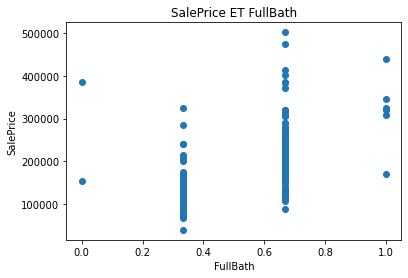

In [67]:
# Scatterplot with FullBath & SalePrice

plt.scatter(train_set['FullBath'],train_set['SalePrice'])
plt.title('SalePrice ET FullBath')
plt.xlabel('FullBath')
plt.ylabel('SalePrice')
plt.show()

## Supprimer les valeurs aberantes

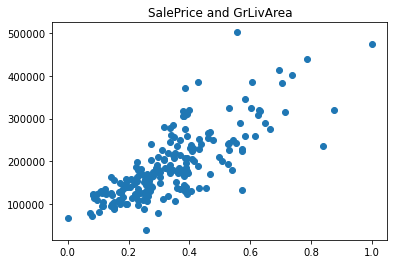

In [68]:
# GrLivArea et SalePrice
plt.scatter(train_set['GrLivArea'],train_set['SalePrice'])
plt.title('SalePrice and GrLivArea')
plt.show()

In [69]:
# cherche outlier
print(np.where(train_set['GrLivArea']>4500))

(array([], dtype=int64),)


In [72]:
# drop out point
train_set = train_set.drop(train_set[train_set['Id'] == 1299].index)
train_set = train_set.drop(train_set[train_set['Id'] == 524].index)

KeyError: 'Id'

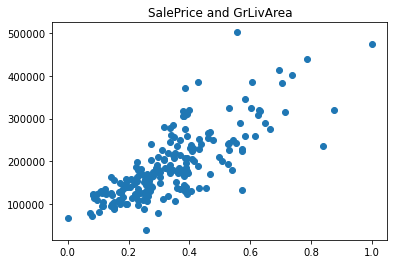

In [73]:
# scatterplot entre GrLivArea et SalePrice devient:
plt.scatter(train_set['GrLivArea'],train_set['SalePrice'])
plt.title('SalePrice and GrLivArea')
plt.show()


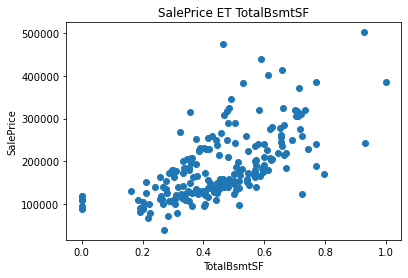

In [74]:
# scatterplot entre TotalBsmtSF et SalePrice devient:

plt.scatter(train_set['TotalBsmtSF'],train_set['SalePrice'])
plt.title('SalePrice ET TotalBsmtSF')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

In [75]:
# correlation change
corr = train_set.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
GrLivArea          0.779001
GarageCars         0.708087
GarageArea         0.701432
TotalBsmtSF        0.626632
                     ...   
SaleType_ConLD          NaN
SaleType_ConLw          NaN
SaleType_Oth            NaN
Functional_Maj2         NaN
Functional_Sev          NaN
Name: SalePrice, Length: 262, dtype: float64

In [76]:
# dummy=pd.get_dummies(train_set[var_nominale])
# train_set=pd.concat([train_set,dummy],axis=1)
# train_set.drop('Id',axis=1,inplace=True)
# train_set.drop(var_nominale,axis=1,inplace=True)

# dummy1=pd.get_dummies(train_set[var_nominale])
# test_set=pd.concat([test_set,dummy1],axis=1)
# test_set.drop(var_nominale,axis=1,inplace=True)
# test_set.drop('Id',axis=1,inplace=True)

In [77]:
# train_set['renovation']=train_set['YearRemodAdd']-train_set['YearBuilt']
# train_set.drop(['YearRemodAdd','YearBuilt'],axis=1,inplace=True)
# test_set['renovation']=test_set['YearRemodAdd']-test_set['YearBuilt']
# test_set.drop(['YearRemodAdd','YearBuilt'],axis=1,inplace=True)

In [78]:
Sale=train_set['SalePrice']
test=train_set.columns
test=test.drop('SalePrice')
df=pd.concat([train_set[test],test_set],axis=0)
dummy=pd.get_dummies(train_set[var_nominale])
df=pd.concat([df,dummy],axis=1)
df.drop('Id',axis=1,inplace=True)
df.drop(var_nominale,axis=1,inplace=True)

df['renovation']=df['YearRemodAdd']-df['YearBuilt']
df.drop(['YearRemodAdd','YearBuilt'],axis=1,inplace=True)

test

KeyError: "None of [Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',\n       'Condition1', 'Condition2', 'Utilities', 'LotConfig', 'LandSlope',\n       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',\n       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',\n       'Foundation', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',\n       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',\n       'Electrical', 'SaleCondition', 'SaleType', 'PavedDrive', 'GarageCond',\n       'GarageQual', 'GarageFinish', 'GarageType', 'Functional',\n       'KitchenQual'],\n      dtype='object')] are in the [columns]"

In [79]:
df.dropna(axis=0,inplace=True)
df.isnull().sum().sort_values()

LotFrontage             0
ExterCond_Ex            0
ExterCond_Fa            0
ExterCond_Gd            0
ExterCond_Po            0
                       ..
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
Neighborhood_Timber     0
renovation              0
Length: 261, dtype: int64

In [80]:
train_set=pd.concat([df[:210],Sale],axis=1)
test_set=df[210:]

In [81]:
# La correrlation des var quantitatives les plus elevee
corr_set=pd.concat([train_set[var_quantitative1],train_set['SalePrice']],axis=1)
z=corr_set.corr()['SalePrice'].abs().sort_values()
z=z[z>0.5].index
corr_elevee=z[:len(z)-1]

In [82]:
#Normalisation 
from sklearn.preprocessing import MinMaxScaler
# definir min max scaler
scaler = MinMaxScaler()
# transformer les donnees
train_set[var_quantitative1] = scaler.fit_transform(train_set[var_quantitative1])

Text(0.5, 1.0, 'Carte De Correlation')

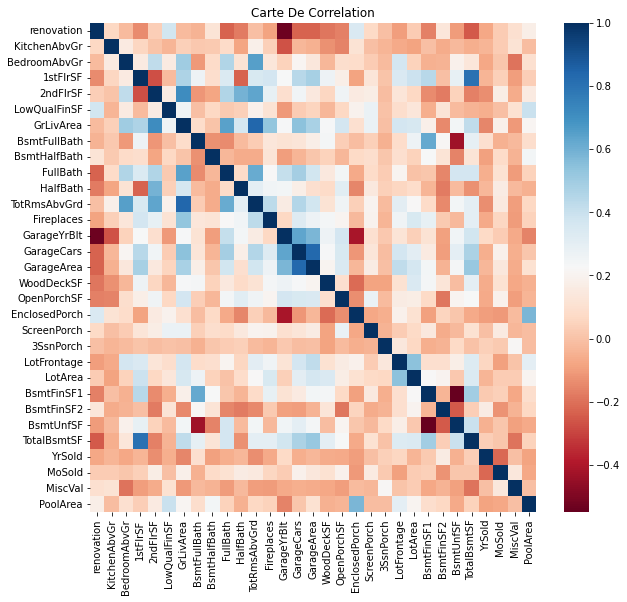

In [83]:
#heatmap
plt.figure(figsize=(10,9))
sns.heatmap(train_set[var_quantitative1].corr(),cmap="RdBu").set_title('Carte De Correlation')

In [84]:
train_set[var_quantitative1].describe()

,renovation,KitchenAbvGr,BedroomAbvGr,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,YrSold,MoSold,MiscVal,PoolArea
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,...,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.114719,0.047619,0.476190,0.369568,0.228875,0.018964,0.332878,0.183333,0.071429,0.533333,...,0.330283,0.172881,0.233598,0.038543,0.255159,0.452256,0.434524,0.463636,0.016667,0.004762
std,0.218876,0.213468,0.129261,0.190636,0.298252,0.116931,0.165560,0.251233,0.258155,0.187884,...,0.154431,0.106654,0.242348,0.139336,0.195007,0.173373,0.349553,0.258426,0.109767,0.069007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.333333,0.219094,0.000000,0.000000,0.221179,0.000000,0.000000,0.333333,...,0.254902,0.123112,0.000000,0.000000,0.116010,0.341137,0.000000,0.272727,0.000000,0.000000
50%,0.000000,0.000000,0.500000,0.349136,0.000000,0.000000,0.314281,0.000000,0.000000,0.666667,...,0.320261,0.163801,0.196429,0.000000,0.209760,0.446279,0.500000,0.454545,0.000000,0.000000
75%,0.127273,0.000000,0.500000,0.499214,0.485227,0.000000,0.401878,0.500000,0.000000,0.666667,...,0.403595,0.201510,0.374869,0.000000,0.359589,0.570966,0.750000,0.636364,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
#Supprimer les lignes qui sont dupliquees et ne laisser que la premiere occurence et le remplacer dans le DataSet
train_set.drop_duplicates(keep = 'first', inplace=True)

In [86]:
#Liste contenant le nom des colonnes excepte SalePrice
test=train_set.columns
test=test.drop('SalePrice')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X=train_set[z]
y=train_set['SalePrice']
lr=LinearRegression()
lr.fit(X,train_set['SalePrice'])
y_pred=lr.predict(X)


In [87]:
train_set.isnull().sum().sort_values()
test_set.isnull().sum().sort_values()

LotFrontage             0
ExterCond_Ex            0
ExterCond_Fa            0
ExterCond_Gd            0
ExterCond_Po            0
                       ..
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
Neighborhood_Timber     0
renovation              0
Length: 261, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split
X=train_set
X=X.drop(columns=['SalePrice'])
y=train_set['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [89]:
#Regression lineaire avec la colonne "GrLivArea"

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(X_train[['GrLivArea']],y_train)
y_pred=lr.predict(X_test[['GrLivArea']])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [52]:
mean_squared_error(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [53]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(lr, X[['GrLivArea']], y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

C:\Users\MohamedHosameKANALI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MohamedHosameKANALI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MohamedHosameKANALI\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 662, in fit
    X, y = self._validate_data(
  File "C:\Users\MohamedHosameKANALI\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y

nan

In [54]:
#Descente de gradient Stochastique
sgd_reg=SGDRegressor(max_iter=50,eta0=0.1,penalty=None)
sgd_reg.fit(X[['GrLivArea']],y)
y_pred=sgd_reg.predict(X[['GrLivArea']])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
mean_squared_error(train_set['SalePrice'], y_pred)

In [ ]:
#Regression lineaire multiple avec toute les var Quantitative

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(X_train[var_quantitative1],y_train)
y_pred=lr.predict(X_test[var_quantitative1])

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(lr, X[var_quantitative1], y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lr, X[var_quantitative1], y, cv=10)
RegLin=y_pred

In [ ]:
#Regression lineaire multiple avec toute les var Quantitative ayant une correlation superieur a 0.5 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(X_train[corr_elevee],y_train)
y_pred=lr.predict(X_test[corr_elevee])

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(lr, X, y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
#Regression lineaire multiple sur toute les colonnes

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(lr, X, y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
#Algorithme KNN 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
lr=KNeighborsRegressor(n_neighbors=5,algorithm='brute')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(lr, X, y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lr, X[var_quantitative1], y, cv=10)
KNN=y_pred

In [ ]:
#Regression Polynimial
from sklearn.preprocessing import PolynomialFeatures
X=train_set[var_quantitative1]
y=train_set['SalePrice']
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
y_pred=pol_reg.predict(X_poly)

In [ ]:
mean_squared_error(y, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(pol_reg, X, y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
#Regression Polynimial sur les variables quantitatives
from sklearn.preprocessing import PolynomialFeatures
X=train_set[var_quantitative1]
y=train_set['SalePrice']
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
y_pred=pol_reg.predict(X_poly)

In [ ]:
mean_squared_error(y, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(lr, X[var_quantitative1], y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lr, X[var_quantitative1], y, cv=10)
polyReg=y_pred

In [ ]:
#Algorithme SVM sur toutes les valeurs 

In [ ]:
from sklearn.svm import LinearSVC
lr=LinearSVC(C=2,loss='hinge')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(lr, X, y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lr, X[var_quantitative1], y, cv=10)
SVM=y_pred

In [ ]:
#Algorithme SVM sur toutes les valeurs quantitatives

In [ ]:
from sklearn.svm import LinearSVC
lr=LinearSVC(C=2,loss='hinge')
lr.fit(X_train[var_quantitative1],y_train)
y_pred=lr.predict(X_test[var_quantitative1])

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(lr, X[var_quantitative1], y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
#Arbre de decision sur toutes les valeurs 

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(regressor, X, y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

In [ ]:
#Arbre de decision sur toutes les valeurs quantitatives

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train[var_quantitative1], y_train)
y_pred=regressor.predict(X_test[var_quantitative1])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(regressor, X[var_quantitative1], y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(regressor, X[var_quantitative1], y, cv=10)
decisionTree=y_pred

In [ ]:
#Random forest sur toutes les valeurs

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(regressor, X, y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
#Random forest sur toutes les valeurs quantitatives

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regressor.fit(X_train[var_quantitative1], y_train)
y_pred=regressor.predict(X_test[var_quantitative1])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(regressor, X[var_quantitative1], y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(regressor, X[var_quantitative1], y, cv=10)
RandomForest=y_pred

In [ ]:
#Algorithme GradientBoostingRegressor sur toutes les colonnes
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(reg, X, y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
#Algorithme GradientBoostingRegressor sur les variables quantitatives
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train[var_quantitative1], y_train)
y_pred=reg.predict(X_test[var_quantitative1])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(reg, X[var_quantitative1], y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(regr, X[var_quantitative1], y, cv=10)
GradientBoosting=y_pred

In [ ]:
#Algorithme AdaBoost sur les variables
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(regr, X, y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
#Algorithme AdaBoost sur les variables quantitatives
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train[var_quantitative1], y_train)
y_pred = regr.predict(X_test[var_quantitative1])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
DTR=cross_val_score(regr, X[var_quantitative1], y, cv=10,scoring="neg_mean_squared_error")
resultat=np.sqrt(-DTR)
resultat=np.min(resultat)
resultat

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(regr, X[var_quantitative1], y, cv=10)
AdaboostQuantitative=y_pred

In [ ]:
## Plotting
x_x = np.arange(100, 170)  ## random selected points
## Plotting
plt.figure(figsize=(12, 8))
plt.plot(x_x, y_train.values[100:170], 'r*-',  markersize=10, label='Ground Truth')

plt.plot(x_x, RegLin[100:170], 'y', markersize=7, label='Regression linaire')
plt.plot(x_x, polyReg[100:170], 'm', markersize=7, label='Regression Polynomiale')
plt.plot(x_x, KNN[100:170], 'c', markersize=7, label='KNN')
plt.title('Comparaison des modeles pour 100  points aleatoires dans le Train Dataset', fontsize=14, color='k')
plt.xlabel('Nombres de Points', fontsize=14, color='k')
plt.ylabel('Prediction (median_house_value)', fontsize=14, color='k')
plt.legend()
plt.grid('on')
plt.show()

In [ ]:
## Plotting
x_x = np.arange(100, 170)  ## random selected points
## Plotting
plt.figure(figsize=(12, 8))
plt.plot(x_x, y_train.values[100:170], 'r*-',  markersize=10, label='Ground Truth')
plt.plot(x_x, SVM[100:170], 'g', markersize=7, label='SVM')
plt.plot(x_x, decisionTree[100:170], 'b', markersize=7, label='DecisionTree')
plt.plot(x_x, RandomForest[100:170], 'ko--', markersize=7, label='RandomForest')
plt.title('Comparaison des modeles pour 100  points aleatoires dans le Train Dataset', fontsize=14, color='k')
plt.xlabel('Nombres de Points', fontsize=14, color='k')
plt.ylabel('Prediction (median_house_value)', fontsize=14, color='k')
plt.legend()
plt.grid('on')
plt.show()

In [ ]:
## Plotting
x_x = np.arange(100, 170)  ## random selected points
## Plotting
plt.figure(figsize=(12, 8))
plt.plot(x_x, y_train.values[100:170], 'r*-',  markersize=10, label='Ground Truth')

plt.plot(x_x, GradientBoosting[100:170], 'gx--', markersize=7, label='GradiantBoosting')
plt.plot(x_x, AdaboostQuantitative[100:170], 'bx-', markersize=7, label='AdaBoost')
plt.title('Comparaison des modeles pour 100  points aleatoires dans le Train Dataset', fontsize=14, color='k')
plt.xlabel('Nombres de Points', fontsize=14, color='k')
plt.ylabel('Prediction (median_house_value)', fontsize=14, color='k')
plt.legend()
plt.grid('on')
plt.show()

In [ ]:
## Plotting
x_x = np.arange(100, 170)  ## random selected points
## Plotting
plt.figure(figsize=(12, 8))
plt.plot(x_x, y_train.values[100:170], 'r*-',  markersize=10, label='Ground Truth')

plt.plot(x_x, RegLin[100:170], 'y', markersize=7, label='Regression linaire')
plt.plot(x_x, polyReg[100:170], 'm', markersize=7, label='Regression Polynomiale')
plt.plot(x_x, KNN[100:170], 'c', markersize=7, label='KNN')
plt.plot(x_x, SVM[100:170], 'g', markersize=7, label='SVM')
plt.plot(x_x, decisionTree[100:170], 'b', markersize=7, label='DecisionTree')
plt.plot(x_x, GradientBoosting[100:170], 'bx--', markersize=7, label='GradiantBoosting')
plt.plot(x_x, RandomForest[100:170], 'ko--', markersize=7, label='RandomForest')
plt.plot(x_x, AdaboostQuantitative[100:170], 'bx-', markersize=7, label='AdaBoost')
plt.title('Comparaison des modeles pour 100  points aleatoires dans le Train Dataset', fontsize=14, color='k')
plt.xlabel('Nombres de Points', fontsize=14, color='k')
plt.ylabel('Prediction (median_house_value)', fontsize=14, color='k')
plt.legend()
plt.grid('on')
plt.show()